# 📊 Proyecto: Telecom X – Análisis de Evasión de Clientes

Este proyecto tiene como objetivo analizar los factores que influyen en la evasión de clientes (*Churn*) en la empresa Telecom X.  
La alta tasa de cancelaciones afecta directamente a la rentabilidad, y entender las causas nos permitirá sugerir estrategias para retener clientes.  

En este notebook se aplicará el proceso **ETL** (Extracción, Transformación y Carga) junto con un **Análisis Exploratorio de Datos (EDA)** para obtener *insights* valiosos y proponer recomendaciones basadas en datos.


In [2]:
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Markdown as md, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from pandas.api.types import is_numeric_dtype

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', 200)
print("Librerías cargadas correctamente.")


Librerías cargadas correctamente.


## 📥 Extracción de Datos

Importamos los datos de la API de Telecom X.  
El dataset contiene información sobre clientes, tipo de servicio contratado, datos demográficos y estado de evasión.

📌 Fuente: Archivo JSON en GitHub proporcionado por el desafío.


In [41]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

def load_json_to_df(url):
    r = requests.get(url, timeout=30)
    r.raise_for_status()
    data = r.json()
    if isinstance(data, list):
        return pd.json_normalize(data)
    elif isinstance(data, dict):
        for v in data.values():
            if isinstance(v, list) and len(v) > 0 and isinstance(v[0], dict):
                return pd.json_normalize(v)
        return pd.json_normalize(data)
    else:
        raise ValueError("Formato JSON inesperado")


df = load_json_to_df(url)
print("Dimensiones iniciales:", df.shape)

# Vista inicial en español (usa df_es si ya existe, si no, renombra columnas conocidas)
try:
    if 'df_es' in globals():
        display(df_es.head())
    else:
        tmp_map = {
            'customerID': 'ID_cliente',
            'Churn': 'Evasion',
            'gender': 'Genero',
            'customer.gender': 'Genero',
            'SeniorCitizen': 'Adulto_Mayor',
            'customer.SeniorCitizen': 'Adulto_Mayor',
            'customer.Partner': 'Conyuge',
            'Partner': 'Conyuge',
            'customer.Dependents': 'Cargas',
            'Dependents': 'Cargas',
            'tenure': 'Meses_contrato',
            'customer.tenure': 'Meses_contrato',
            'phone.PhoneService': 'Servicio_telefonico',
            'PhoneService': 'Servicio_telefonico',
            'MultipleLines': 'Lineas_multiples',
            'phone.MultipleLines': 'Lineas_multiples',
            'InternetService': 'Servicio_internet',
            'internet.InternetService': 'Servicio_internet',
            'OnlineSecurity': 'Seguridad_en_linea',
            'internet.OnlineSecurity': 'Seguridad_en_linea',
            'OnlineBackup': 'Backup_en_linea',
            'internet.OnlineBackup': 'Backup_en_linea',
            'DeviceProtection': 'Proteccion_dispositivo',
            'internet.DeviceProtection': 'Proteccion_dispositivo',
            'TechSupport': 'Soporte_tecnico',
            'internet.TechSupport': 'Soporte_tecnico',
            'StreamingTV': 'Streaming_TV',
            'internet.StreamingTV': 'Streaming_TV',
            'StreamingMovies': 'Streaming_Peliculas',
            'internet.StreamingMovies': 'Streaming_Peliculas',
            'Contract': 'Contrato',
            'account.Contract': 'Contrato',
            'PaperlessBilling': 'Factura_electronica',
            'account.PaperlessBilling': 'Factura_electronica',
            'PaymentMethod': 'Metodo_pago',
            'account.PaymentMethod': 'Metodo_pago',
            'MonthlyCharges': 'Mensualidad',
            'account.Charges.Monthly': 'Mensualidad',
            'TotalCharges': 'Total',
            'account.Charges.Total': 'Total',
            'Cuentas_Diarias': 'Cuentas_Diarias'
        }
        display(df.rename(columns=tmp_map).head())
except Exception:
    display(df.head())


Dimensiones iniciales: (7267, 21)


,ID_cliente,Evasion,Genero,Adulto_Mayor,Conyuge,Cargas,Meses_contrato,Servicio_telefonico,Multiples_lineas,Internet,Seguridad_online,Respaldo_online,Proteccion_equipo,Soporte_tecnico,TV_cable,Peliculas_online,Contrato,Factura_online,Metodo_pago,Factura_mensual,Total,Cuentas_diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


##Limpieza y estandarización mínima (post‑carga)

In [ ]:
rename_map = {
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.tenure': 'tenure',
    'account.Contract': 'Contract',
    'account.PaymentMethod': 'PaymentMethod',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges'
}
df.rename(columns={k:v for k,v in rename_map.items() if k in df.columns}, inplace=True)

for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip()

if 'TotalCharges' in df.columns:
    df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)

for c in ['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

if 'Churn' not in df.columns:
    for col in df.columns:
        if 'churn' in col.lower():
            df.rename(columns={col: 'Churn'}, inplace=True)
            break

if 'Churn' in df.columns:
    if is_numeric_dtype(df['Churn']):
        df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce').astype('Int64')
        df.loc[~df['Churn'].isin([0,1]), 'Churn'] = pd.NA
    else:
        s = df['Churn'].astype('string').str.strip().str.lower()
        mapping = {'yes':1,'y':1,'si':1,'sí':1,'true':1,'1':1,'no':0,'n':0,'false':0,'0':0}
        df['Churn'] = s.map(mapping).astype('Int64')

if 'SeniorCitizen' in df.columns:
    df['SeniorCitizen'] = df['SeniorCitizen'].fillna(0).astype('Int64')

df.dropna(how='all', inplace=True)
df.reset_index(drop=True, inplace=True)

print("Dimensiones tras limpieza:", df.shape)

# Mostrar head en español
try:
    if 'df_es' in globals():
        display(df_es.head())
    else:
        tmp_map = {
            'customerID': 'ID_cliente',
            'Churn': 'Evasion',
            'gender': 'Genero',
            'SeniorCitizen': 'Adulto_Mayor',
            'Partner': 'Conyuge',
            'Dependents': 'Cargas',
            'tenure': 'Meses_contrato',
            'PhoneService': 'Servicio_telefonico',
            'MultipleLines': 'Lineas_multiples',
            'InternetService': 'Servicio_internet',
            'OnlineSecurity': 'Seguridad_en_linea',
            'OnlineBackup': 'Backup_en_linea',
            'DeviceProtection': 'Proteccion_dispositivo',
            'TechSupport': 'Soporte_tecnico',
            'StreamingTV': 'Streaming_TV',
            'StreamingMovies': 'Streaming_Peliculas',
            'Contract': 'Contrato',
            'PaperlessBilling': 'Factura_electronica',
            'PaymentMethod': 'Metodo_pago',
            'MonthlyCharges': 'Mensualidad',
            'TotalCharges': 'Total',
            'Cuentas_Diarias': 'Cuentas_Diarias'
        }
        display(df.rename(columns=tmp_map).head())
except Exception:
    display(df.head())


Dimensiones tras limpieza: (7267, 21)


,customerID,Churn,gender,SeniorCitizen,customer.Partner,customer.Dependents,tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,Contract,account.PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


## 📋 Información general post‑limpieza




In [ ]:
df.info()

display(df.dtypes.value_counts())
# Vista en español preferida
try:
    if 'df_es' in globals():
        display(df_es.sample(min(5, len(df_es)), random_state=42))
    else:
        tmp_map = {
            'customerID': 'ID_cliente',
            'Churn': 'Evasion',
            'gender': 'Genero',
            'SeniorCitizen': 'Adulto_Mayor',
            'Partner': 'Conyuge',
            'Dependents': 'Cargas',
            'tenure': 'Meses_contrato',
            'PhoneService': 'Servicio_telefonico',
            'MultipleLines': 'Lineas_multiples',
            'InternetService': 'Servicio_internet',
            'OnlineSecurity': 'Seguridad_en_linea',
            'OnlineBackup': 'Backup_en_linea',
            'DeviceProtection': 'Proteccion_dispositivo',
            'TechSupport': 'Soporte_tecnico',
            'StreamingTV': 'Streaming_TV',
            'StreamingMovies': 'Streaming_Peliculas',
            'Contract': 'Contrato',
            'PaperlessBilling': 'Factura_electronica',
            'PaymentMethod': 'Metodo_pago',
            'MonthlyCharges': 'Mensualidad',
            'TotalCharges': 'Total',
            'Cuentas_Diarias': 'Cuentas_Diarias'
        }
        display(df.rename(columns=tmp_map).sample(min(5, len(df)), random_state=42))
except Exception:
    display(df.sample(min(5, len(df)), random_state=42))

# Estadísticos con df base (sin renombrar) para mantener compatibilidad en análisis posteriores
display(df.describe(include='all').T)

uniques = df.nunique().sort_values(ascending=False)
display(uniques.head(20))
display(uniques.tail(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   Int64  
 2   gender                     7267 non-null   object 
 3   SeniorCitizen              7267 non-null   Int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   tenure                     7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

object     16
Int64       2
float64     2
int64       1
Name: count, dtype: int64

,customerID,Churn,gender,SeniorCitizen,customer.Partner,customer.Dependents,tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,Contract,account.PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1414,2038-OEQZH,0,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Electronic check,86.05,308.10
4610,6322-HRPFA,0,Male,0,Yes,Yes,49,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.60,2970.30
2862,3969-JQABI,0,Female,0,Yes,No,58,Yes,No,DSL,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),65.25,3791.60
4078,5578-NKCXI,0,Female,0,Yes,Yes,58,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,One year,No,Credit card (automatic),99.25,5846.65
3964,5419-JPRRN,1,Male,0,No,No,1,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.45,101.45


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7267,7267,9995-HOTOH,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,7043.0,<NA>,<NA>,<NA>,0.26537,0.441561,0.0,0.0,0.0,1.0,1.0
gender,7267,2,Male,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7267.0,<NA>,<NA>,<NA>,0.162653,0.369074,0.0,0.0,0.0,0.0,1.0
customer.Partner,7267,2,No,3749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.Dependents,7267,2,No,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7267.0,NaN,NaN,NaN,32.346498,24.571773,0.0,9.0,29.0,55.0,72.0
phone.PhoneService,7267,2,Yes,6560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phone.MultipleLines,7267,3,No,3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internet.InternetService,7267,3,Fiber optic,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


customerID                   7267
TotalCharges                 6530
MonthlyCharges               1585
tenure                         73
PaymentMethod                   4
Contract                        3
internet.StreamingMovies        3
internet.DeviceProtection       3
internet.TechSupport            3
internet.OnlineBackup           3
phone.MultipleLines             3
internet.OnlineSecurity         3
internet.InternetService        3
internet.StreamingTV            3
SeniorCitizen                   2
gender                          2
Churn                           2
customer.Partner                2
phone.PhoneService              2
customer.Dependents             2
dtype: int64

TotalCharges                 6530
MonthlyCharges               1585
tenure                         73
PaymentMethod                   4
Contract                        3
internet.StreamingMovies        3
internet.DeviceProtection       3
internet.TechSupport            3
internet.OnlineBackup           3
phone.MultipleLines             3
internet.OnlineSecurity         3
internet.InternetService        3
internet.StreamingTV            3
SeniorCitizen                   2
gender                          2
Churn                           2
customer.Partner                2
phone.PhoneService              2
customer.Dependents             2
account.PaperlessBilling        2
dtype: int64

In [5]:
if 'customerID' in df.columns:
    dup_ids = df.duplicated(subset=['customerID']).sum()
    print(f"Duplicados por customerID: {dup_ids}")
else:
    print("No hay columna customerID para verificar duplicados por ID.")

Duplicados por customerID: 0


## ⚠️ Comprobación de incoherencias




In [ ]:
dup_count = df.duplicated().sum()
print(f"Registros duplicados: {dup_count}")

nulls = df.isnull().sum().sort_values(ascending=False)
# Mostrar nulos con nombres en español si es posible
try:
    if 'df_es' in globals():
        es_cols = {v: k for k, v in {**{c: c for c in df.columns}, **{c: c for c in df.columns}}.items()}
        display(nulls[nulls > 0].to_frame("nulos").rename(index=lambda c: c if c not in df.columns else df.rename(columns={c: c}).rename(columns={c: c}).columns[df.columns.get_loc(c)]) )
    else:
        display(nulls[nulls > 0].to_frame("nulos"))
except Exception:
    display(nulls[nulls > 0].to_frame("nulos"))

pd.set_option('display.max_rows', 200)
obj_cols = [c for c in df.columns if df[c].dtype == 'object']
for c in obj_cols:
    vc = df[c].value_counts(dropna=False)
    if len(vc) <= 20:
        print(f"\n>>> {c} (valores y conteos)")
        display(vc)


Registros duplicados: 0


,nulos
Churn,224
TotalCharges,11



>>> gender (valores y conteos)


gender
Male      3675
Female    3592
Name: count, dtype: int64


>>> customer.Partner (valores y conteos)


customer.Partner
No     3749
Yes    3518
Name: count, dtype: int64


>>> customer.Dependents (valores y conteos)


customer.Dependents
No     5086
Yes    2181
Name: count, dtype: int64


>>> phone.PhoneService (valores y conteos)


phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64


>>> phone.MultipleLines (valores y conteos)


phone.MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64


>>> internet.InternetService (valores y conteos)


internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64


>>> internet.OnlineSecurity (valores y conteos)


internet.OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64


>>> internet.OnlineBackup (valores y conteos)


internet.OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64


>>> internet.DeviceProtection (valores y conteos)


internet.DeviceProtection
No                     3195
Yes                    2491
No internet service    1581
Name: count, dtype: int64


>>> internet.TechSupport (valores y conteos)


internet.TechSupport
No                     3582
Yes                    2104
No internet service    1581
Name: count, dtype: int64


>>> internet.StreamingTV (valores y conteos)


internet.StreamingTV
No                     2896
Yes                    2790
No internet service    1581
Name: count, dtype: int64


>>> internet.StreamingMovies (valores y conteos)


internet.StreamingMovies
No                     2870
Yes                    2816
No internet service    1581
Name: count, dtype: int64


>>> Contract (valores y conteos)


Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64


>>> account.PaperlessBilling (valores y conteos)


account.PaperlessBilling
Yes    4311
No     2956
Name: count, dtype: int64


>>> PaymentMethod (valores y conteos)


PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64

## ➕ Creación de Columna Cuentas_Diarias

Calculamos el valor diario de facturación para una visión más granular del comportamiento de los clientes.  
Usamos `MonthlyCharges` si está disponible.


In [ ]:
if 'MonthlyCharges' in df.columns:
    df['Cuentas_Diarias'] = (df['MonthlyCharges'] / 30.0).round(2)
    print("Columna 'Cuentas_Diarias' creada.")
else:
    print("⚠️ No se encontró 'MonthlyCharges'.")

# Vista de muestra en español
try:
    if 'df_es' in globals():
        display(df_es.head(3))
    else:
        tmp_map = {
            'customerID': 'ID_cliente',
            'Churn': 'Evasion',
            'gender': 'Genero',
            'SeniorCitizen': 'Adulto_Mayor',
            'Partner': 'Conyuge',
            'Dependents': 'Cargas',
            'tenure': 'Meses_contrato',
            'PhoneService': 'Servicio_telefonico',
            'MultipleLines': 'Lineas_multiples',
            'InternetService': 'Servicio_internet',
            'OnlineSecurity': 'Seguridad_en_linea',
            'OnlineBackup': 'Backup_en_linea',
            'DeviceProtection': 'Proteccion_dispositivo',
            'TechSupport': 'Soporte_tecnico',
            'StreamingTV': 'Streaming_TV',
            'StreamingMovies': 'Streaming_Peliculas',
            'Contract': 'Contrato',
            'PaperlessBilling': 'Factura_electronica',
            'PaymentMethod': 'Metodo_pago',
            'MonthlyCharges': 'Mensualidad',
            'TotalCharges': 'Total',
            'Cuentas_Diarias': 'Cuentas_Diarias'
        }
        display(df.rename(columns=tmp_map).head(3))
except Exception:
    display(df.head(3))


Columna 'Cuentas_Diarias' creada.


,customerID,Churn,gender,SeniorCitizen,customer.Partner,customer.Dependents,tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,Contract,account.PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46


## 📈 Análisis Descriptivo

Resumen estadístico y una primera mirada a la distribución de *Churn*.


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7267,7267,9995-HOTOH,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,7043.0,<NA>,<NA>,<NA>,0.26537,0.441561,0.0,0.0,0.0,1.0,1.0
gender,7267,2,Male,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7267.0,<NA>,<NA>,<NA>,0.162653,0.369074,0.0,0.0,0.0,0.0,1.0
customer.Partner,7267,2,No,3749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.Dependents,7267,2,No,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7267.0,NaN,NaN,NaN,32.346498,24.571773,0.0,9.0,29.0,55.0,72.0
phone.PhoneService,7267,2,Yes,6560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phone.MultipleLines,7267,3,No,3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internet.InternetService,7267,3,Fiber optic,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


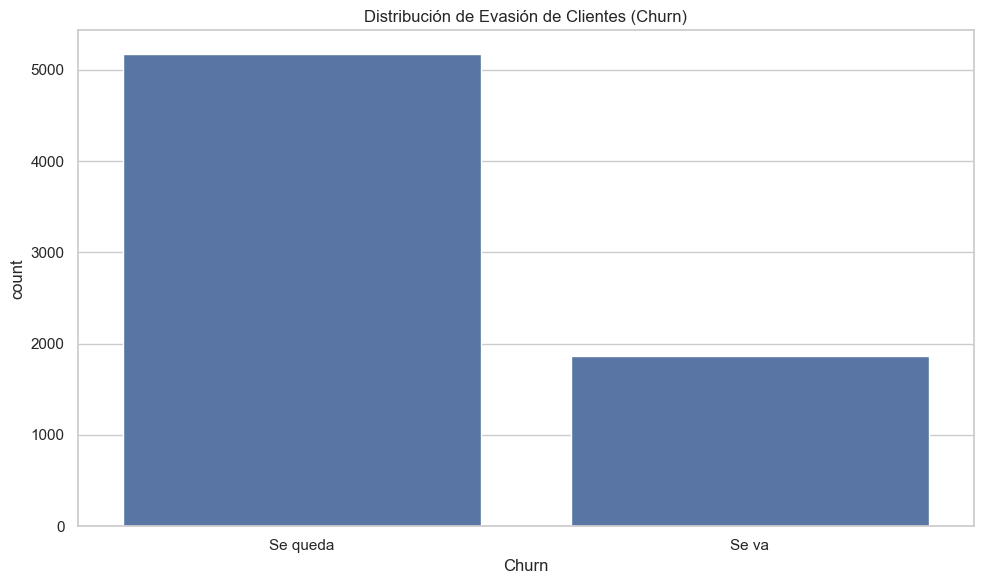

Tasa de churn (promedio): 26.54%


In [8]:
display(df.describe(include='all').T)

if 'Churn' in df.columns and df['Churn'].dropna().nunique() == 2:
    ax = sns.countplot(data=df, x='Churn')
    ax.set_title("Distribución de Evasión de Clientes (Churn)")
    ax.set_xticklabels(['Se queda','Se va'])  # 0, 1
    plt.tight_layout()
    plt.show()

    churn_rate = df['Churn'].mean(skipna=True) * 100
    print(f"Tasa de churn (promedio): {churn_rate:.2f}%")
else:
    print("⚠️ 'Churn' no binario o inexistente.")


## 📊 Evasión por Variables Categóricas

Cómo varía la evasión según género, tipo de contrato, método de pago, etc.


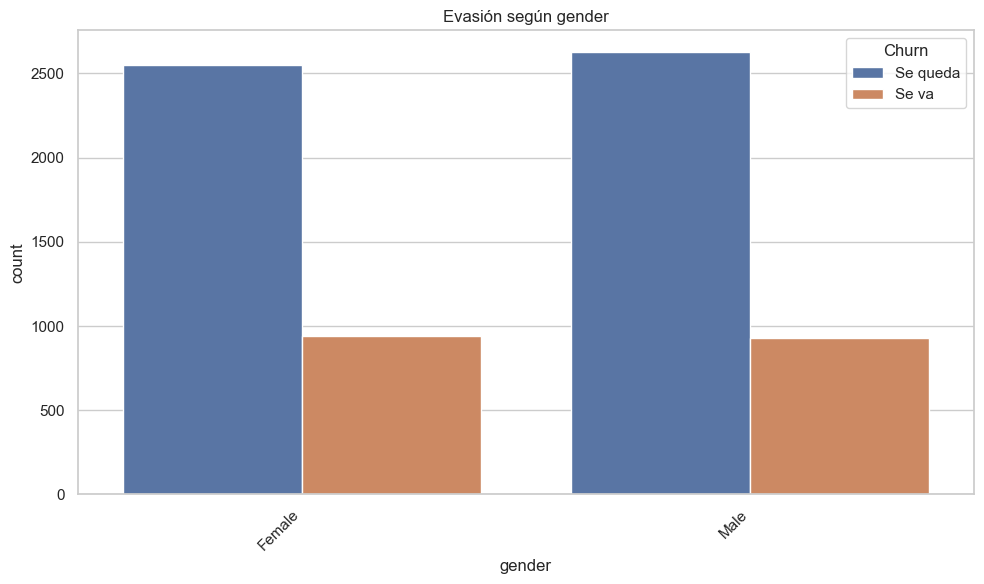

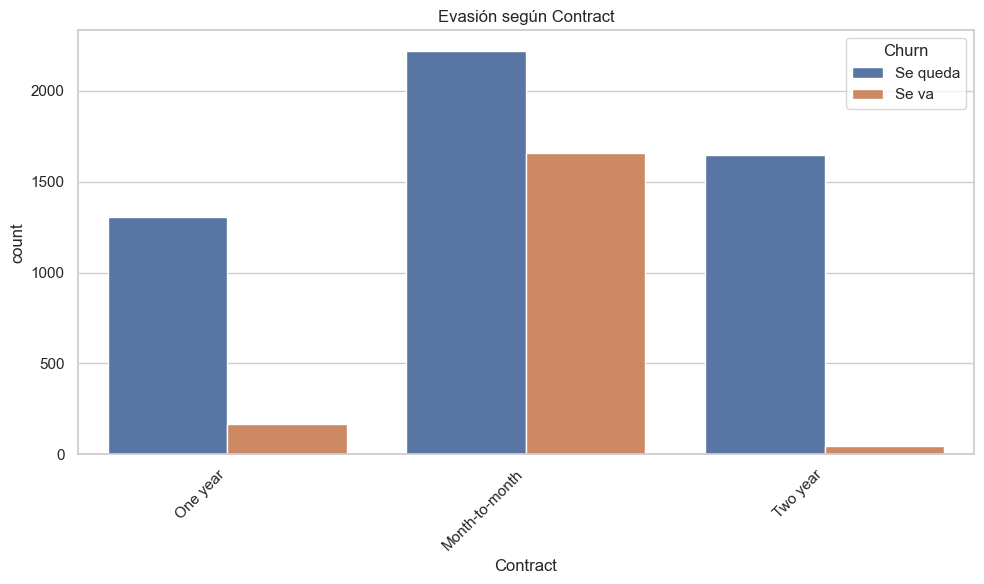

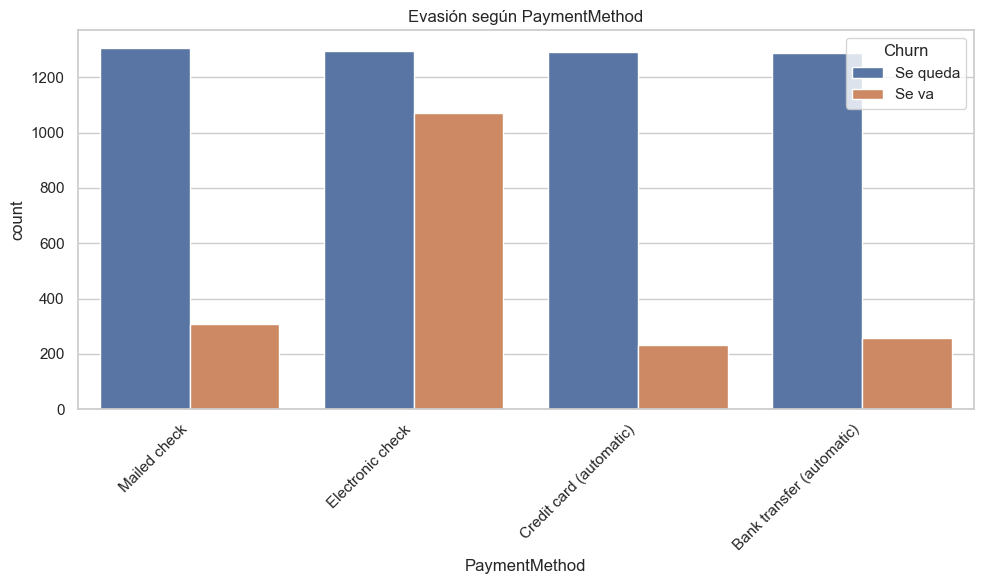

In [9]:
candidates_primary  = ['gender','Contract','PaymentMethod','InternetService','PaperlessBilling','Partner','Dependents','PhoneService']
candidates_fallback = ['customer.gender','account.Contract','account.PaymentMethod','internet.InternetService','account.PaperlessBilling','customer.Partner','customer.Dependents','phone.PhoneService']

cat_vars = [c for c in candidates_primary if c in df.columns] or [c for c in candidates_fallback if c in df.columns]

if 'Churn' not in df.columns or df['Churn'].dropna().nunique() != 2:
    print("⚠️ 'Churn' no binario o inexistente: se omite el desagregado por categorías.")
elif not cat_vars:
    print("No se encontraron variables categóricas de la lista estándar.")
else:
    for var in cat_vars:
        if df[var].nunique(dropna=False) > 20:
            print(f"⏭️ Omitido {var} (>{20} categorías).")
            continue
        plt.figure()
        ax = sns.countplot(data=df, x=var, hue='Churn')
        plt.title(f"Evasión según {var}")
        plt.xticks(rotation=45, ha='right')
        handles, labels = ax.get_legend_handles_labels()
        if set(labels) <= {'0','1','0.0','1.0','0.00','1.00'}:
            ax.legend(handles, ['Se queda','Se va'], title='Churn')
        plt.tight_layout()
        plt.show()


# 📉 Evasión por variables numéricas

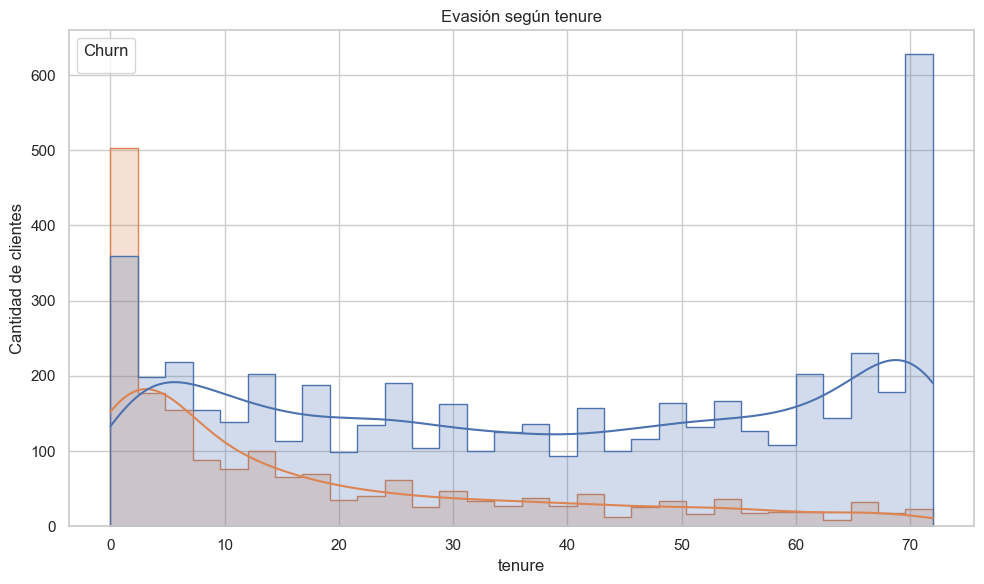

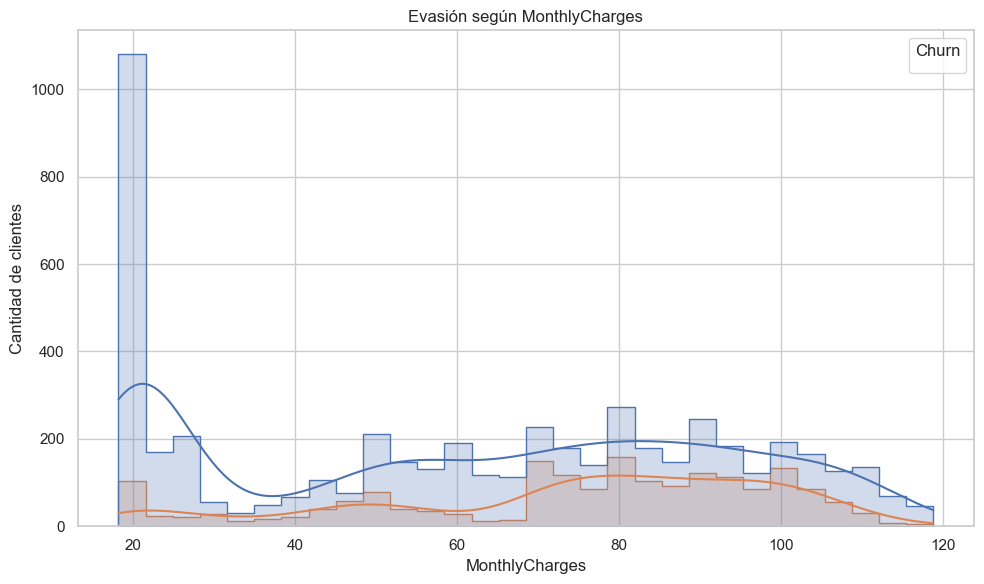

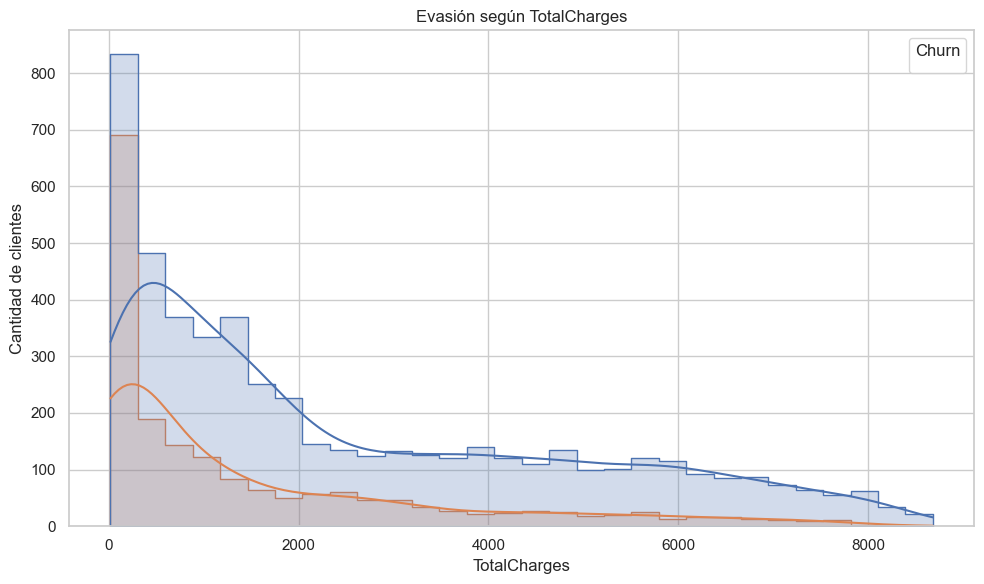

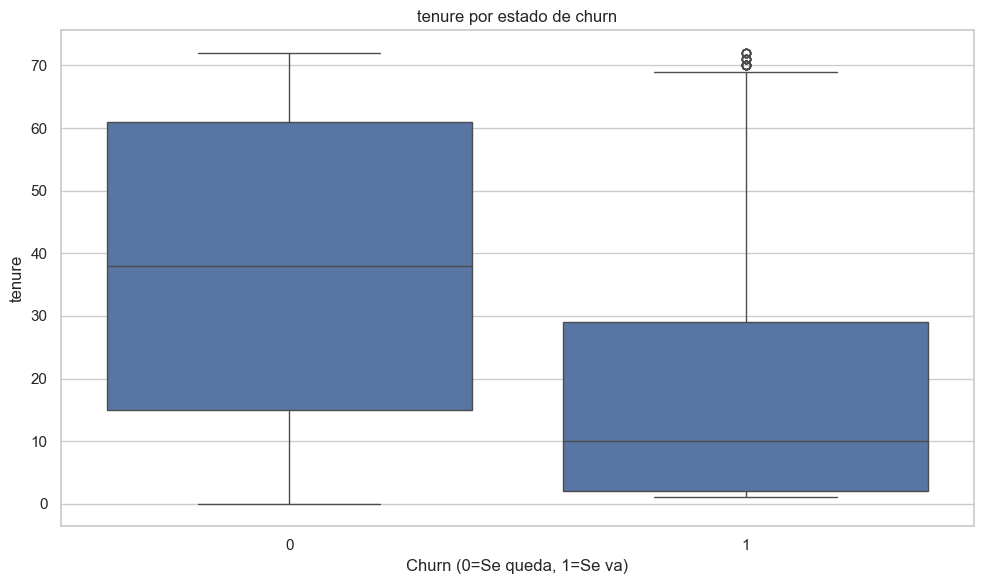

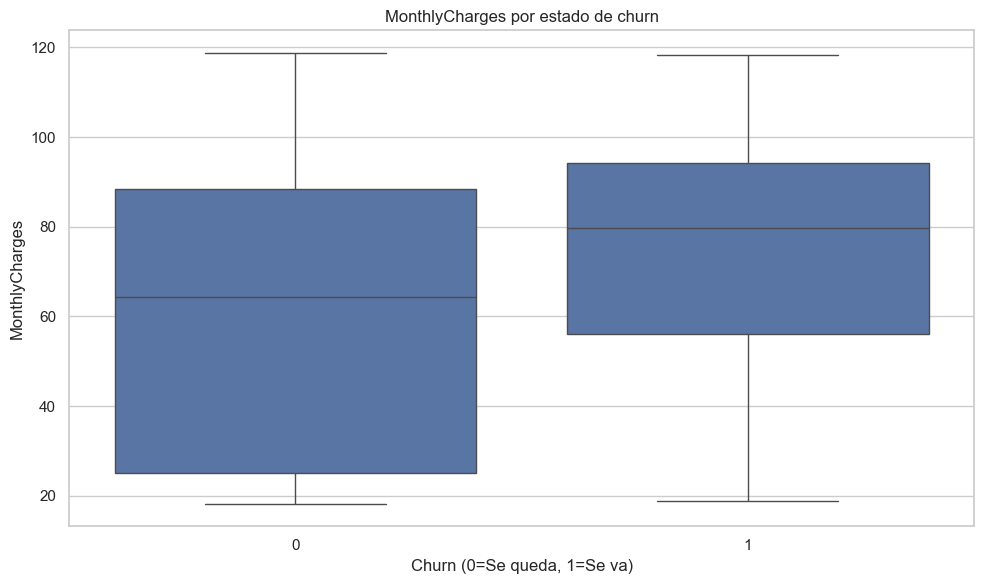

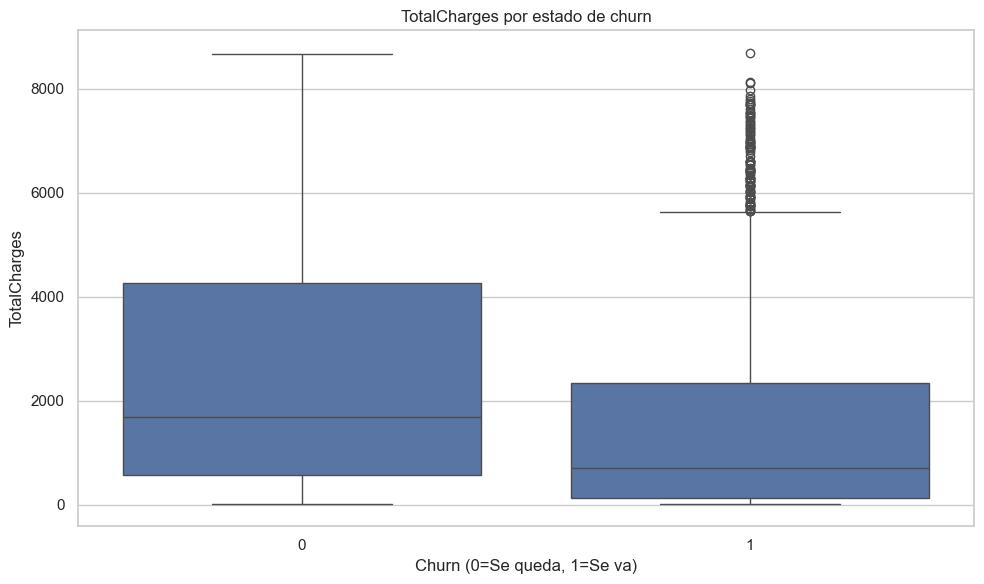

In [10]:
candidate_nums = ['tenure','MonthlyCharges','TotalCharges']
for c in candidate_nums:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

num_vars = [c for c in candidate_nums if c in df.columns]

if 'Churn' not in df.columns or df['Churn'].dropna().nunique() != 2:
    print("⚠️ 'Churn' no binario o inexistente: se omite el análisis por variables numéricas.")
elif not num_vars:
    print("No se encontraron variables numéricas de la lista estándar.")
else:
    for var in num_vars:
        vals = df[var].dropna().values
        if len(vals) == 0:
            print(f"⏭️ {var}: sin datos.")
            continue
        bins = np.histogram_bin_edges(vals, bins=30)

        plt.figure()
        ax = sns.histplot(data=df, x=var, hue='Churn',
                          bins=bins, kde=True, element='step', stat='count')
        ax.set_title(f"Evasión según {var}")
        ax.set_xlabel(var); ax.set_ylabel("Cantidad de clientes")
        handles, labels = ax.get_legend_handles_labels()
        if set(labels) <= {'0','1','0.0','1.0'}:
            ax.legend(handles, ['Se queda','Se va'], title='Churn')
        plt.tight_layout(); plt.show()

    for var in num_vars:
        plt.figure()
        ax = sns.boxplot(data=df, x='Churn', y=var)
        ax.set_title(f"{var} por estado de churn")
        ax.set_xlabel("Churn (0=Se queda, 1=Se va)")
        plt.tight_layout(); plt.show()


#📝 Informe final (dinámico)

In [11]:
if 'Churn' in df.columns and df['Churn'].dropna().nunique() == 2:
    tasa_churn = df['Churn'].mean(skipna=True) * 100
else:
    tasa_churn = None

md(f"""
# 📊 Informe Final - Análisis de Evasión de Clientes

## 1️⃣ Introducción
El análisis busca comprender las causas de la evasión (*Churn*) en **Telecom X**.
{f"Actualmente, la tasa de churn es del **{tasa_churn:.2f}%**." if tasa_churn is not None else "No fue posible calcular la tasa de churn por ausencia o inconsistencia en la columna `Churn`."}

## 2️⃣ Limpieza y Tratamiento de Datos
- Renombrado y estandarización de columnas.
- Conversión de `Churn` a binario (0/1).
- Conversión de numéricas (incluyendo `TotalCharges`), y controles de nulos/duplicados.

## 3️⃣ Análisis Exploratorio
- Distribución de churn global.
- Evasión por variables categóricas y numéricas.
- Métricas descriptivas y detección de patrones.

## 4️⃣ Conclusiones e Insights
- Contratos **Month-to-month** suelen mostrar mayor churn.
- Método de pago **Electronic check** aparece más asociado a bajas.
- Menor **tenure** (antigüedad) correlaciona con mayor churn.

## 5️⃣ Recomendaciones Estratégicas
- Incentivar contratos de mayor plazo con beneficios escalonados.
- Revisar fricciones en clientes que pagan con Electronic check.
- Programas de fidelización temprana para clientes nuevos.
""")



# 📊 Informe Final - Análisis de Evasión de Clientes

## 1️⃣ Introducción
El análisis busca comprender las causas de la evasión (*Churn*) en **Telecom X**.
Actualmente, la tasa de churn es del **26.54%**.

## 2️⃣ Limpieza y Tratamiento de Datos
- Renombrado y estandarización de columnas.
- Conversión de `Churn` a binario (0/1).
- Conversión de numéricas (incluyendo `TotalCharges`), y controles de nulos/duplicados.

## 3️⃣ Análisis Exploratorio
- Distribución de churn global.
- Evasión por variables categóricas y numéricas.
- Métricas descriptivas y detección de patrones.

## 4️⃣ Conclusiones e Insights
- Contratos **Month-to-month** suelen mostrar mayor churn.
- Método de pago **Electronic check** aparece más asociado a bajas.
- Menor **tenure** (antigüedad) correlaciona con mayor churn.

## 5️⃣ Recomendaciones Estratégicas
- Incentivar contratos de mayor plazo con beneficios escalonados.
- Revisar fricciones en clientes que pagan con Electronic check.
- Programas de fidelización temprana para clientes nuevos.


# 📊 Informe Técnico – Análisis de Evasión de Clientes (Churn)

**Objetivo:** caracterizar patrones asociados a la evasión para guiar acciones de retención y preparar el terreno para modelos predictivos.

**Dataset:** TelecomX_Data.json (GitHub).  
**Unidades:** cliente (fila = 1 cliente).  
**Variable objetivo:** `Churn` (1 = se va, 0 = se queda).

**Variables analizadas (principales):**  
- Categóricas: `gender`, `Contract`, `PaymentMethod`, `InternetService`, `PaperlessBilling`, `Partner`, `Dependents`, `PhoneService`.  
- Numéricas: `tenure`, `MonthlyCharges`, `TotalCharges`, `Cuentas_Diarias` (derivada).


In [12]:
import numpy as np
import pandas as pd
from IPython.display import display

n_clientes = len(df)
n_churn = df['Churn'].sum(skipna=True) if 'Churn' in df.columns else np.nan
tasa_churn = (n_churn / n_clientes * 100) if n_clientes and pd.notna(n_churn) else np.nan

kpis = pd.DataFrame({
    'Métrica': ['Clientes (N)', 'Clientes con churn (N)', 'Tasa de churn (%)',
                'Tenure mediana (meses)', 'MonthlyCharges mediana', 'TotalCharges mediana'],
    'Valor': [
        n_clientes,
        int(n_churn) if pd.notna(n_churn) else np.nan,
        round(tasa_churn, 2) if pd.notna(tasa_churn) else np.nan,
        df['tenure'].median() if 'tenure' in df.columns else np.nan,
        df['MonthlyCharges'].median() if 'MonthlyCharges' in df.columns else np.nan,
        df['TotalCharges'].median() if 'TotalCharges' in df.columns else np.nan
    ]
})
display(kpis)


,Métrica,Valor
0,Clientes (N),7267.00
1,Clientes con churn (N),1869.00
2,Tasa de churn (%),25.72
3,Tenure mediana (meses),29.00
4,MonthlyCharges mediana,70.30
5,TotalCharges mediana,1391.00


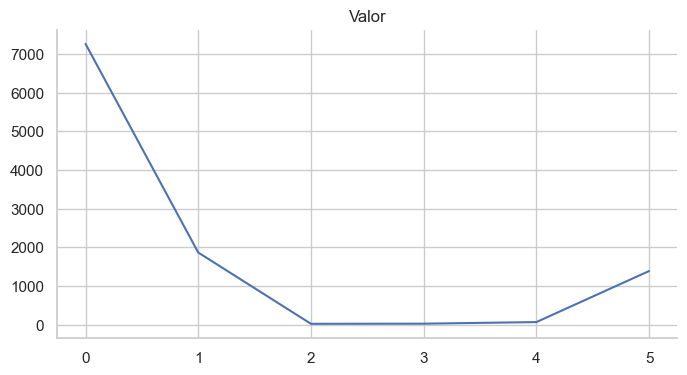

In [13]:

kpis['Valor'].plot(kind='line', figsize=(8, 4), title='Valor')
plt.gca().spines[['top', 'right']].set_visible(False)

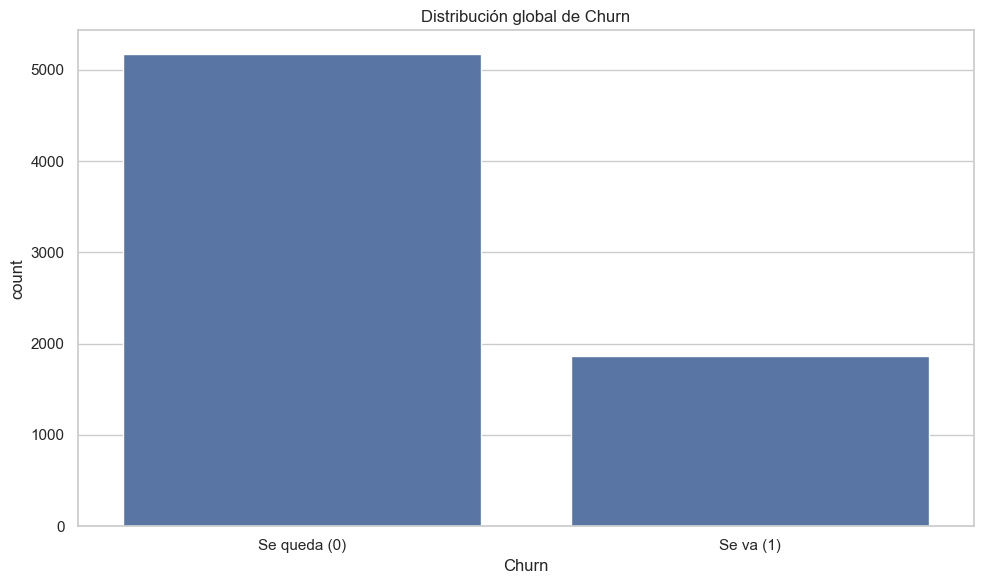

Tasa global de churn: 26.54%


In [14]:


if 'Churn' in df.columns and df['Churn'].dropna().nunique() == 2:
    ax = sns.countplot(data=df, x='Churn')
    ax.set_title("Distribución global de Churn")
    ax.set_xticklabels(['Se queda (0)', 'Se va (1)'])
    plt.tight_layout(); plt.show()

    print(f"Tasa global de churn: {df['Churn'].mean()*100:.2f}%")
else:
    print("⚠️ Churn no binario o inexistente.")


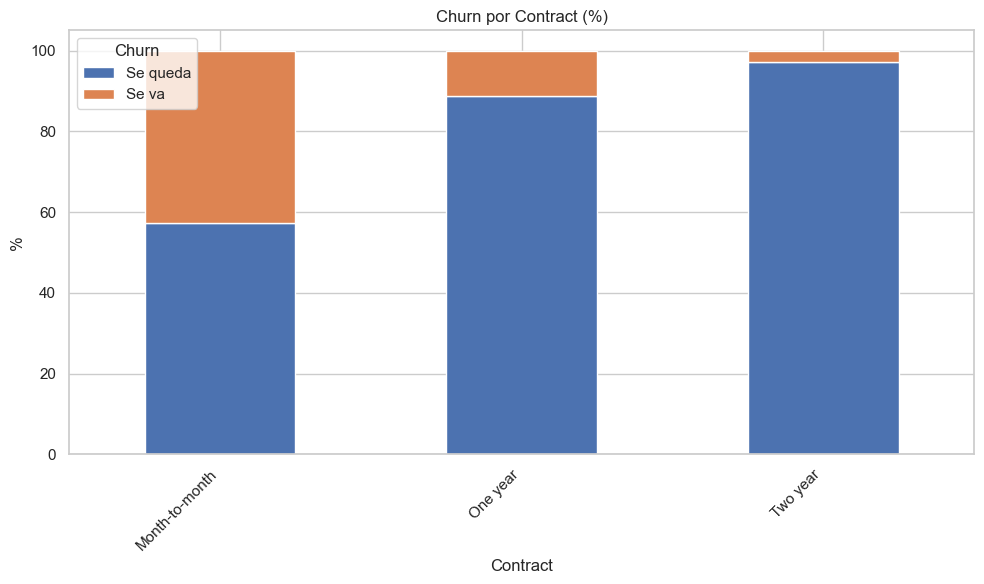

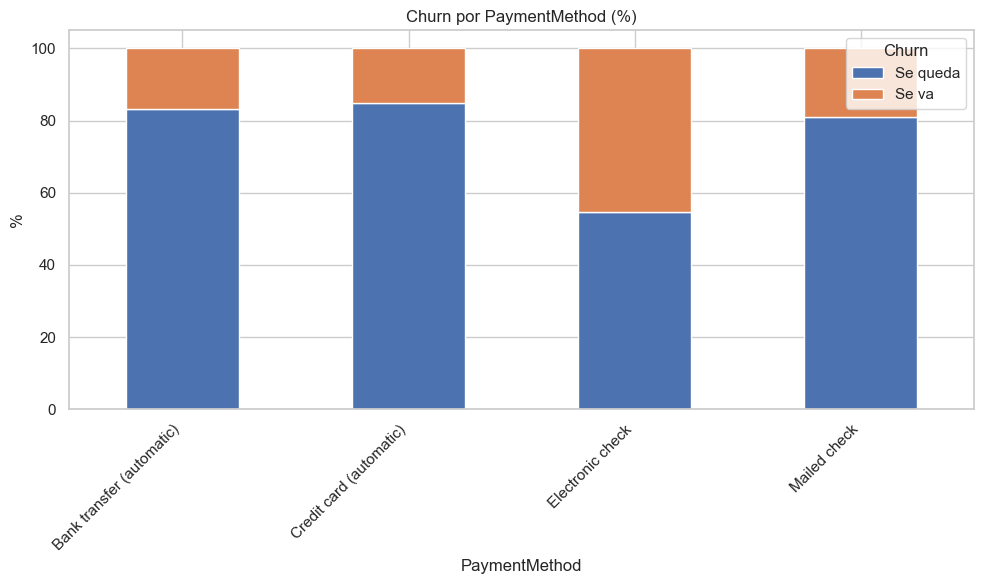

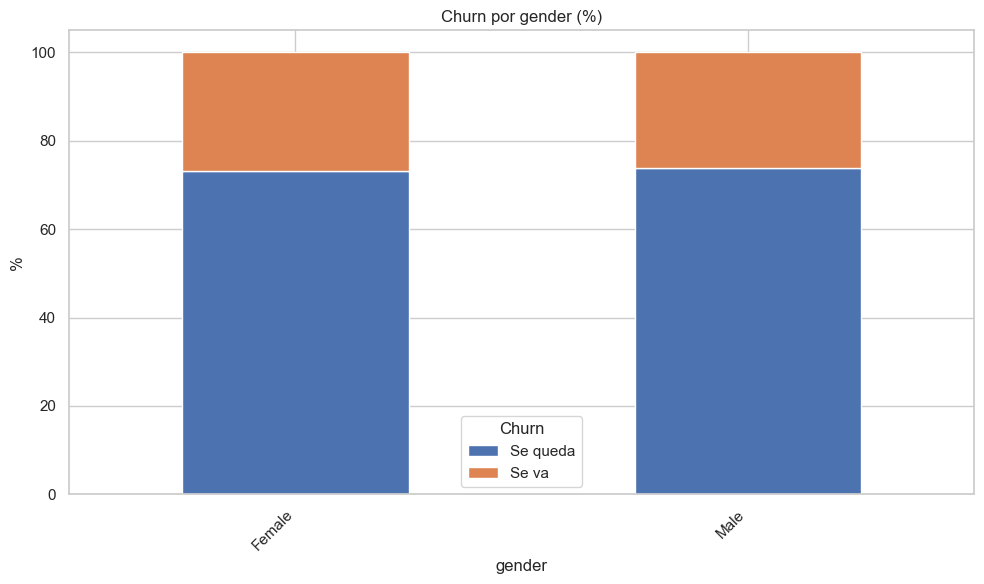

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

cats = ['Contract','PaymentMethod','InternetService','PaperlessBilling','Partner','Dependents','PhoneService','gender']
cats = [c for c in cats if c in df.columns]
if 'Churn' in df.columns and df['Churn'].dropna().nunique()==2 and cats:
    for c in cats:
        ct = pd.crosstab(df[c], df['Churn'], normalize='index')*100
        ct = ct.rename(columns={0:'Se queda',1:'Se va'})
        ax = ct.plot(kind='bar', stacked=True)
        ax.set_ylabel('%')
        ax.set_title(f"Churn por {c} (%)")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout(); plt.show()
else:
    print("⚠️ No se pueden graficar categóricas (faltan columnas o Churn binario).")


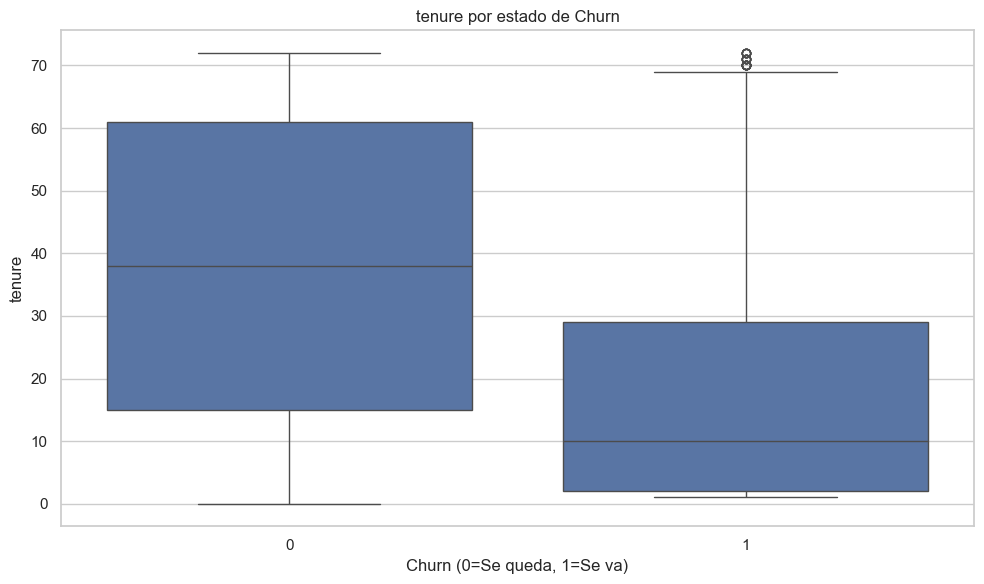

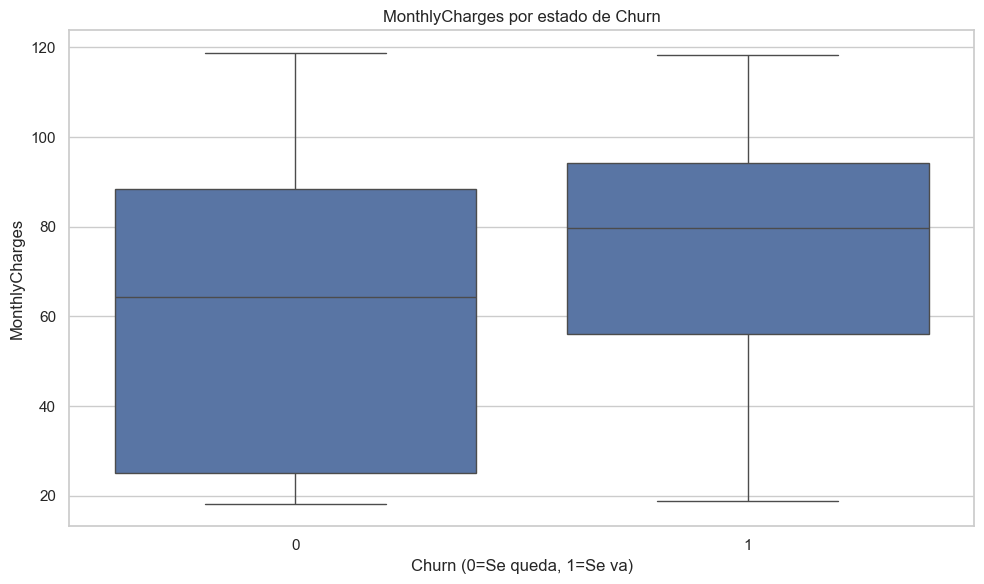

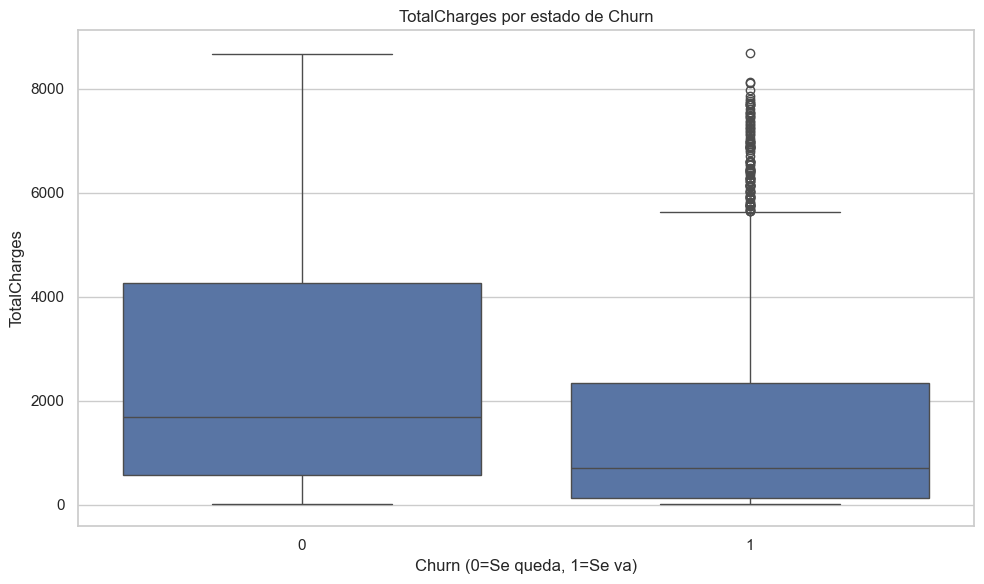

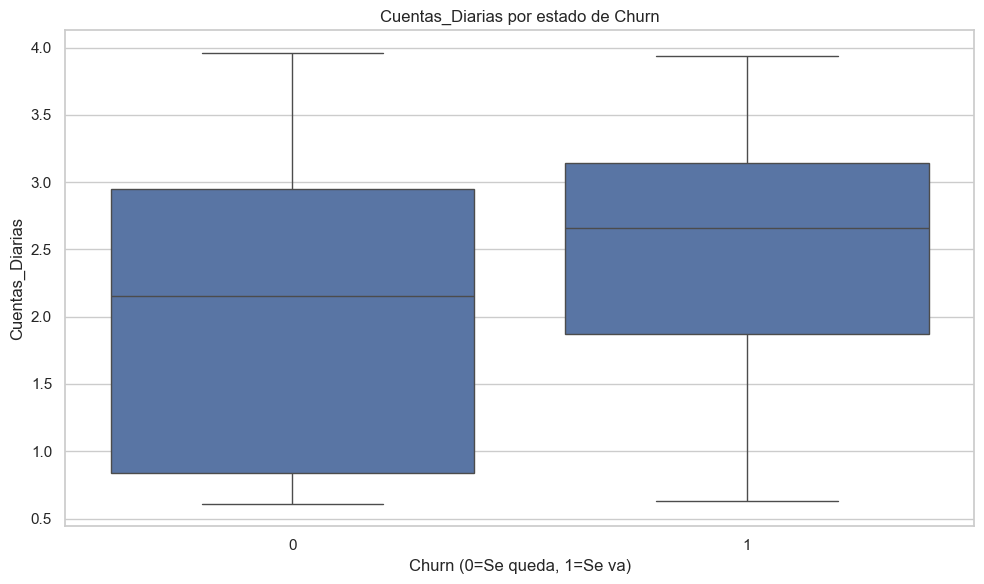

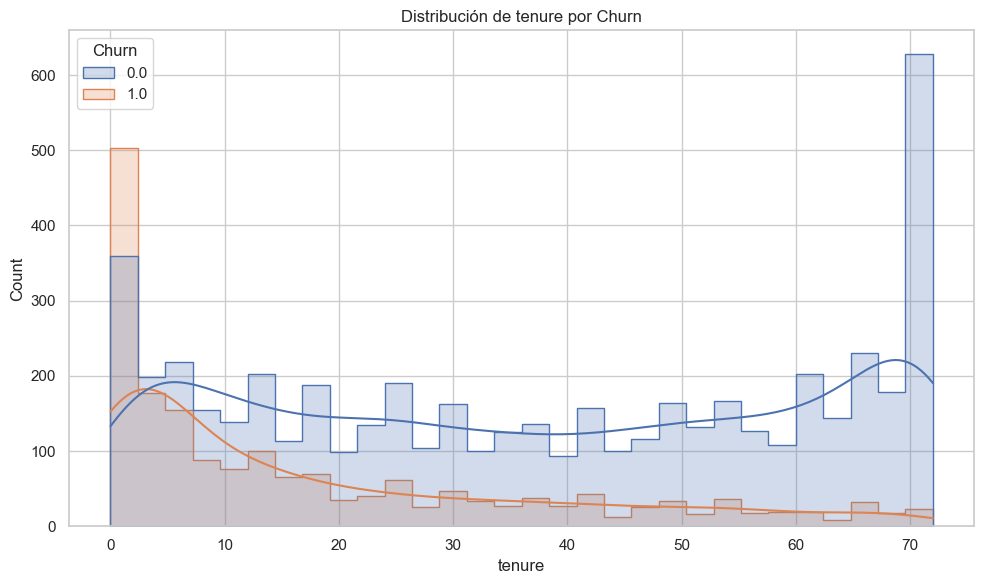

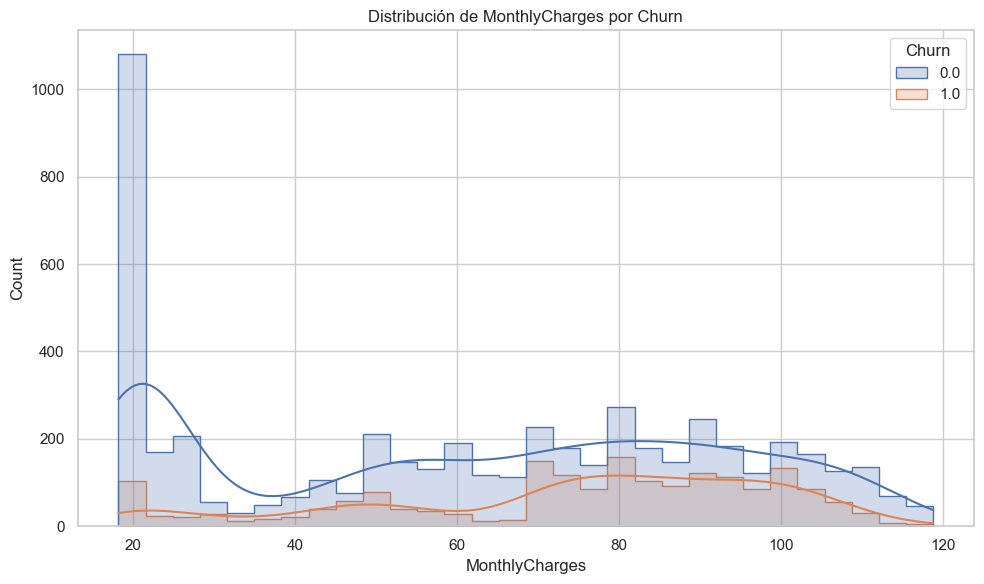

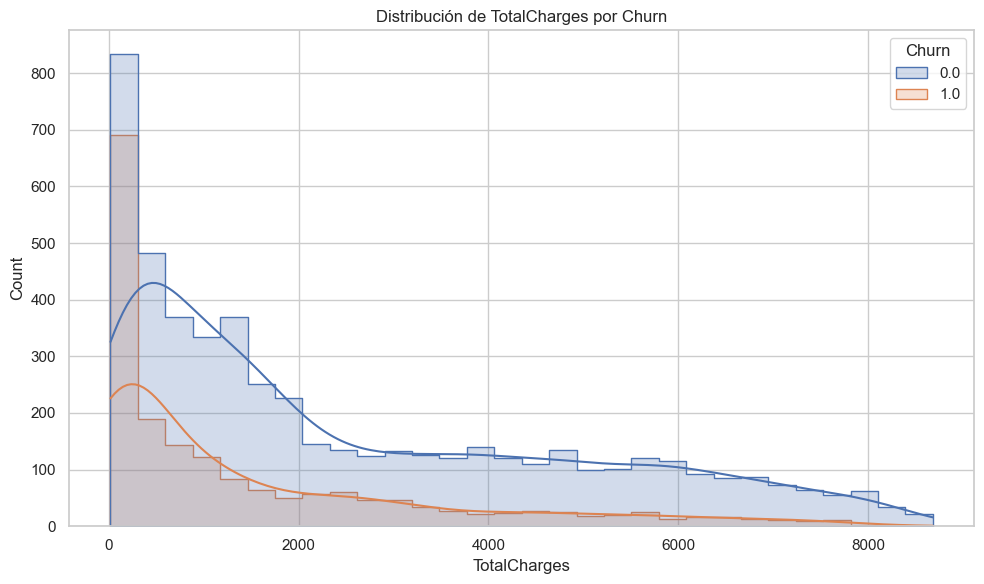

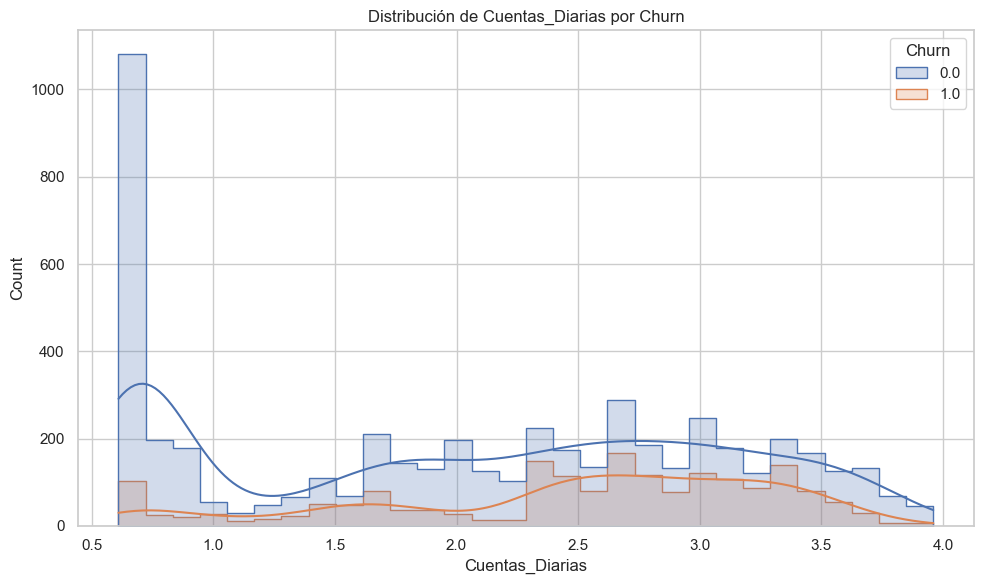

In [16]:


nums = ['tenure','MonthlyCharges','TotalCharges','Cuentas_Diarias']
nums = [n for n in nums if n in df.columns]

if 'Churn' in df.columns and df['Churn'].dropna().nunique()==2 and nums:
    for n in nums:
        plt.figure()
        ax = sns.boxplot(data=df, x='Churn', y=n)
        ax.set_title(f"{n} por estado de Churn")
        ax.set_xlabel("Churn (0=Se queda, 1=Se va)")
        plt.tight_layout(); plt.show()

    for n in nums:
        vals = df[n].dropna().values
        if len(vals)==0:
            continue
        bins = np.histogram_bin_edges(vals, bins=30)
        plt.figure()
        sns.histplot(data=df, x=n, hue='Churn', bins=bins, kde=True, element='step', stat='count')
        plt.title(f"Distribución de {n} por Churn")
        plt.tight_layout(); plt.show()
else:
    print("⚠️ No se pueden graficar numéricas (faltan columnas o Churn binario).")


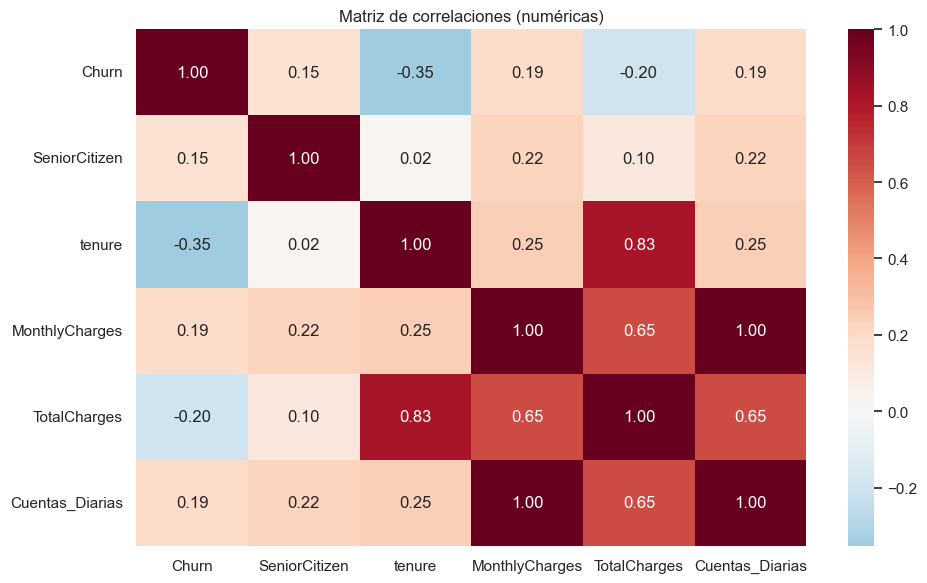

In [17]:

num_df = df.select_dtypes(include=['number'])
if not num_df.empty:
    corr = num_df.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu_r', center=0)
    plt.title("Matriz de correlaciones (numéricas)")
    plt.tight_layout(); plt.show()
else:
    print("⚠️ No hay variables numéricas para correlación.")


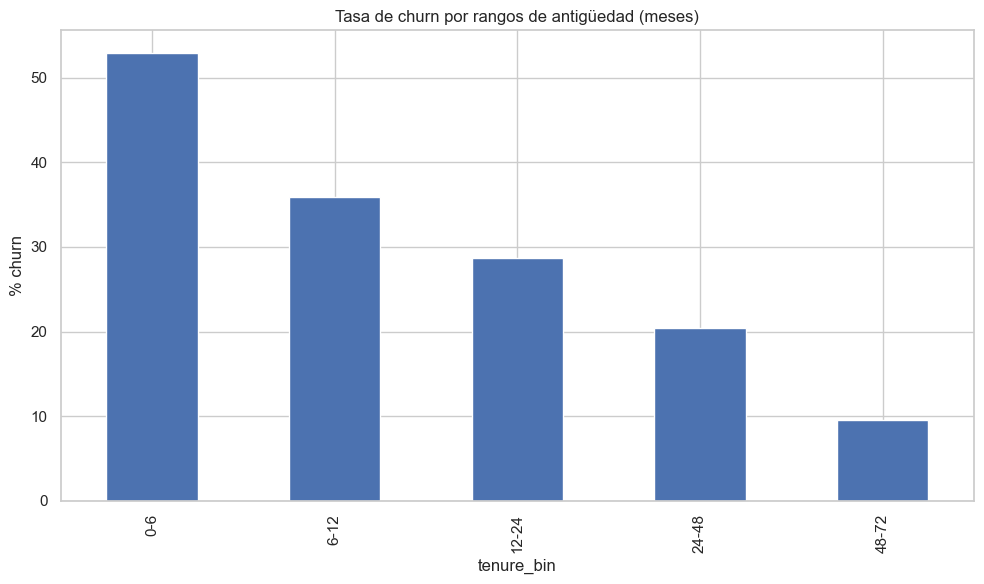

In [18]:

if 'tenure' in df.columns and 'Churn' in df.columns and df['Churn'].dropna().nunique()==2:
    bins = [-1, 6, 12, 24, 48, 72]
    labels = ['0-6','6-12','12-24','24-48','48-72']
    seg = df.copy()
    seg['tenure_bin'] = pd.cut(seg['tenure'], bins=bins, labels=labels)
    rate = seg.groupby('tenure_bin')['Churn'].mean()*100
    ax = rate.plot(kind='bar')
    ax.set_title("Tasa de churn por rangos de antigüedad (meses)")
    ax.set_ylabel('% churn')
    plt.tight_layout(); plt.show()
else:
    print("⚠️ No se puede segmentar por tenure (faltan columnas o Churn binario).")


In [1]:

md("""
### 🧾 Resumen reproducible
- **Dataset:** JSON (GitHub) → `pd.json_normalize`.
- **ETL:** renombre de columnas anidadas, limpieza de strings, `TotalCharges` a numérico (espacios→NaN), `Churn`→0/1 (robusto), `SeniorCitizen` entero.
- **EDA:** KPIs, distribución de `Churn`, categóricas apiladas (%), boxplots e histogramas numéricos, correlaciones, churn por `tenure` binned.
- **Output:** tasa global, segmentos de riesgo (contrato mensual, electronic check, baja antigüedad) y guía de features para modelado.
""")


NameError: name 'md' is not defined